# 计算&模拟&建模

任务分为三个，分别是：

1. 计算：单个资产的收益率(annualised)以及各个资产之间的协方差矩阵
2. 模拟：MC模拟投资组合，画出对应的标准差-收益率图形(散点图)
3. 建模：允许卖空和不允许卖空的有效前沿，构建标准差最小的投资组合；加入无风险资产，重新建模

## 0. 数据与工具准备

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pypfopt
from pypfopt.expected_returns import mean_historical_return, log_returns_from_prices
from pypfopt.risk_models import sample_cov, CovarianceShrinkage

In [3]:
from pypfopt.plotting import plot_covariance, plot_efficient_frontier, plot_weights

In [4]:
df = pd.read_csv('../data/parsedData.csv')
df.head()

,000568.SZ,000858.SZ,002007.SZ,002032.SZ,0388.HK,0700.HK,1093.HK,1169.HK,1177.HK,2269.HK,300015.SZ,600009.SH,600161.SH,600519.SH,600809.SH
0,65.78,80.58,28.10,40.71,250.2,417.8,16.40,22.20,13.80,44.10,30.42,44.40,30.03,703.85,56.34
1,66.40,80.90,28.90,41.10,249.2,422.2,17.20,22.15,13.90,44.45,30.25,44.05,30.04,715.86,56.67
2,68.75,82.99,28.99,41.35,254.6,431.8,17.60,22.50,14.14,48.00,29.67,44.10,30.09,737.07,58.91
3,68.05,82.68,28.60,41.11,253.2,433.2,17.46,22.45,13.80,50.40,31.50,44.15,29.76,738.36,58.45
4,68.45,82.20,28.47,40.59,262.0,438.6,17.76,23.45,14.10,49.25,33.63,43.03,29.44,752.13,57.36


## 1. 计算

In [5]:
mu = mean_historical_return(df)
S = sample_cov(df)

In [6]:
mu

000568.SZ    0.243688
000858.SZ    0.378293
002007.SZ    0.289389
002032.SZ    0.285632
0388.HK      0.105315
0700.HK      0.074023
1093.HK      0.087351
1169.HK      0.083233
1177.HK      0.150655
2269.HK      0.579694
300015.SZ    0.277663
600009.SH    0.287796
600161.SH    0.223646
600519.SH    0.350333
600809.SH    0.467954
dtype: float64

In [7]:
S

,000568.SZ,000858.SZ,002007.SZ,002032.SZ,0388.HK,0700.HK,1093.HK,1169.HK,1177.HK,2269.HK,300015.SZ,600009.SH,600161.SH,600519.SH,600809.SH
000568.SZ,0.176166,0.145429,0.059672,0.074917,0.048316,0.058349,0.079480,0.068678,0.084305,0.088331,0.087082,0.073503,0.057415,0.106127,0.138573
000858.SZ,0.145429,0.167046,0.064199,0.072368,0.050851,0.058884,0.081337,0.069151,0.084725,0.089213,0.089412,0.071226,0.054483,0.110014,0.137727
002007.SZ,0.059672,0.064199,0.235359,0.046788,0.025036,0.033813,0.068190,0.033320,0.073640,0.059895,0.087686,0.044787,0.094671,0.048960,0.067887
002032.SZ,0.074917,0.072368,0.046788,0.137179,0.037085,0.040369,0.043883,0.046849,0.049011,0.052100,0.058422,0.047880,0.048354,0.053508,0.069520
0388.HK,0.048316,0.050851,0.025036,0.037085,0.067549,0.058670,0.054537,0.049996,0.057914,0.056316,0.043046,0.033791,0.031803,0.040003,0.047176
0700.HK,0.058349,0.058884,0.033813,0.040369,0.058670,0.102319,0.069243,0.064973,0.071091,0.077884,0.048684,0.036586,0.035538,0.051724,0.053442
1093.HK,0.079480,0.081337,0.068190,0.043883,0.054537,0.069243,0.225465,0.072228,0.179126,0.119961,0.099520,0.048628,0.060541,0.067686,0.080693
1169.HK,0.068678,0.069151,0.033320,0.046849,0.049996,0.064973,0.072228,0.144135,0.078679,0.069264,0.063629,0.041113,0.030488,0.055118,0.068586
1177.HK,0.084305,0.084725,0.073640,0.049011,0.057914,0.071091,0.179126,0.078679,0.290329,0.127553,0.109088,0.054976,0.069685,0.068908,0.084974
2269.HK,0.088331,0.089213,0.059895,0.052100,0.056316,0.077884,0.119961,0.069264,0.127553,0.245462,0.076298,0.053319,0.054688,0.072324,0.089870


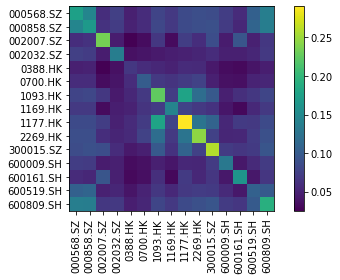

In [8]:
plot_covariance(S, filename="../pics/covplot.png")

## 2. 模拟

我们首先写个生成随机权重的工具，下面的`genRandomWeights`函数生成$n$个权重$w_i$, 且保证$\sum_{i=1}^{n}w_i = 1$

In [9]:
def genRandomWeights(n):
    nums = [random.randint(1, 100) for _ in range(n)]
    total = sum(nums)
    return [num / total for num in nums]

In [10]:
def MC(n):
    expectedReturn = []
    volatility = []
    for _ in range(n):
        ws = genRandomWeights(15)
        er, v, _ = pypfopt.base_optimizer.portfolio_performance(ws, mu, S)
        expectedReturn.append(er)
        volatility.append(v)
    df = pd.DataFrame()
    fig = plt.figure(figsize=(14, 8))
    df['volatility'] = volatility
    df['expectedReturn'] = expectedReturn
    df.sort_values(by='volatility')
    plt.plot(volatility, expectedReturn, 'ko', alpha=0.2)
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.savefig('../pics/MC.png', dpi=300)
    plt.show()

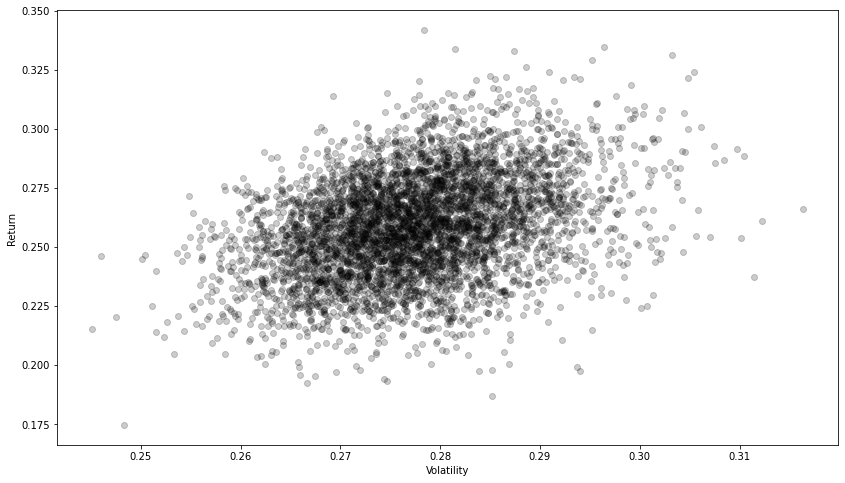

In [11]:
MC(5000)

## 3. 建模

### 3.1 15个股票

#### 3.1.1 15个股票-允许卖空

In [12]:
cla1 = pypfopt.cla.CLA(mu, S, weight_bounds=(-1, 1))

In [13]:
cla1.min_volatility()

OrderedDict([('000568.SZ', -0.05763645569151581),
             ('000858.SZ', -0.16708291181197776),
             ('002007.SZ', 0.06951839947284215),
             ('002032.SZ', 0.113392427206716),
             ('0388.HK', 0.4813793587676724),
             ('0700.HK', 0.015736512881812013),
             ('1093.HK', 0.004530452483428538),
             ('1169.HK', 0.0743701658141564),
             ('1177.HK', -0.035406610800801416),
             ('2269.HK', -0.016752816770184163),
             ('300015.SZ', -0.009318260263883705),
             ('600009.SH', 0.14484962439835183),
             ('600161.SH', 0.10311272175334169),
             ('600519.SH', 0.30886471896998274),
             ('600809.SH', -0.029557326409940573)])

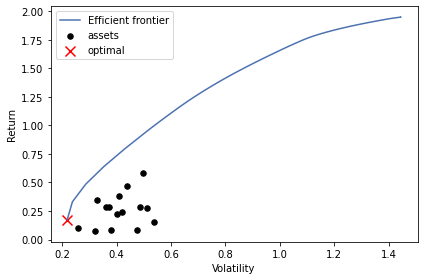

In [14]:
plot_efficient_frontier(cla1, filename="../pics/15个股票-允许卖空.png")

In [15]:
cla1.portfolio_performance()

(0.1751908237034943, 0.21865317764863756, 0.7097579160403357)

expected return=0.175, volatility=0.219， Sharpe ratio=0.71

注意这里评估的时候默认风险利率(risk-free rate of borrowing/lending)为0.02.

#### 3.1.2 15个股票不允许卖空

In [16]:
cla2 = pypfopt.cla.CLA(mu, S, weight_bounds=(0, 1))

In [17]:
cla2.min_volatility()

OrderedDict([('000568.SZ', 0.0),
             ('000858.SZ', 0.0),
             ('002007.SZ', 0.05974288273502094),
             ('002032.SZ', 0.09081567227463302),
             ('0388.HK', 0.4723133223963647),
             ('0700.HK', 0.019896703915597745),
             ('1093.HK', 0.0),
             ('1169.HK', 0.04880785722702579),
             ('1177.HK', 0.0),
             ('2269.HK', 0.0),
             ('300015.SZ', 0.0),
             ('600009.SH', 0.12481824366544407),
             ('600161.SH', 0.09133457574177568),
             ('600519.SH', 0.09227074204413839),
             ('600809.SH', 0.0)])

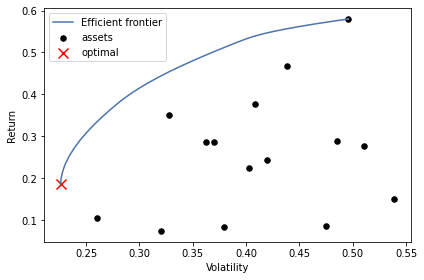

In [18]:
plot_efficient_frontier(cla2, filename="../pics/15个股票-不允许卖空.png")

In [19]:
cla2.portfolio_performance()

(0.18717996536380205, 0.22624918690058, 0.7389196295201071)

expected return=0.187 volatility=0.226， Sharpe ratio=0.739

注意这里评估的时候默认风险利率(risk-free rate of borrowing/lending)为0.02.

### 3.2 15个股票+一个无风险资产
无风险资产暂定为使用十年国债，等数据拿到会写在下面。